<img width=200 src="https://www.smhi.se/polopoly_fs/1.135796.1527766089!/image/LoggaEUCP.png_gen/derivatives/Original_366px/image/LoggaEUCP.png"> <img width=200 src="https://zenodo.org/api/files/00000000-0000-0000-0000-000000000000/is-enes3/logo.png"> <img width=200 src="https://www.dtls.nl/wp-content/uploads/2015/03/NleSc.png"> <img width=200 src="https://www.dkrz.de/++theme++dkrz.theme/images/logo.png"> <img width=200 src="https://jupyter.org/assets/hublogo.svg"> <img width=200 src="https://docs.esmvaltool.org/en/latest/_static/ESMValTool-logo.png">

# The new Python API for ESMValTool

ESMValTool is a library of climate analysis workflows ("recipes"), as well as a tool to execute them. With the new Python API, this library is now also easily accessible in Jupyter environment. It allows you to easily run existing recipes as well as developing new ones. A very useful feature is that you can directly access all the output (data, images, etc) and further process them in the notebook.

In [1]:
# Import the tool
import esmvalcore.experimental as esmvaltool

/mnt/lustre01/pf/b/b381307/kernels/esmvaltool_dev/lib/python3.8/site-packages/esmvalcore/experimental/_warnings.py:18: UserWarning: 
  Thank you for trying out the new ESMValCore API.
  Note that this API is experimental and may be subject to change.
  More info: https://github.com/ESMValGroup/ESMValCore/issues/498
/mnt/lustre01/pf/b/b381307/kernels/esmvaltool_dev/lib/python3.8/site-packages/iris/config.py:139: UserWarning: Ignoring config item 'Resources':'test_data_dir' (section:option) as '/home/h05/itwl/projects/git/iris-test-data/test_data' is not a valid directory path.
/mnt/lustre01/pf/b/b381307/kernels/esmvaltool_dev/lib/python3.8/site-packages/esmvalcore/experimental/config/_config_validators.py:254: ESMValToolDeprecationWarning: `write_plots` will be removed in 2.4.0.
/mnt/lustre01/pf/b/b381307/kernels/esmvaltool_dev/lib/python3.8/site-packages/esmvalcore/experimental/config/_config_validators.py:255: ESMValToolDeprecationWarning: `write_netcdf` will be removed in 2.4.0.


### Inspect/modify settings

If you want, you can look at the configuration. Notice that there are some default data paths set to where CMIP data is stored on Mistral. 

In [2]:
esmvaltool.CFG

Config({'auxiliary_data_dir': PosixPath('/mnt/lustre01/pf/b/b381307/auxiliary_data'),
        'compress_netcdf': False,
        'config_developer_file': None,
        'config_file': PosixPath('/pf/b/b381307/.esmvaltool/config-user.yml'),
        'drs': {'CMIP3': 'DKRZ',
                'CMIP5': 'DKRZ',
                'CMIP6': 'DKRZ',
                'CORDEX': 'BADC',
                'OBS': 'default',
                'OBS6': 'default',
                'ana4mips': 'default',
                'native6': 'default',
                'obs4mips': 'default'},
        'exit_on_warning': False,
        'log_level': 'info',
        'max_parallel_tasks': 1,
        'output_dir': PosixPath('/scratch/b/b381307/esmvaltool_output'),
        'output_file_type': 'png',
        'profile_diagnostic': False,
        'remove_preproc_dir': False,
        'rootpath': {'CMIP3': [PosixPath('/mnt/lustre02/work/bd0854/DATA/ESMValTool2/CMIP3')],
                     'CMIP5': [PosixPath('/mnt/lustre02/work/bd0854/DA

The default settings should be okay for most use cases. However, should you wish to modify some settings, this is quite straightforward:

### See all the available ESMValTool recipes

In [3]:
all_recipes = esmvaltool.get_all_recipes()
all_recipes

[Recipe('Recipe extreme index'),
 Recipe('Recipe snowalbedo'),
 Recipe('Recipe tcr'),
 Recipe('Recipe ocean quadmap'),
 Recipe('Recipe seaice drift'),
 Recipe('Recipe smpi'),
 Recipe('Recipe validation'),
 Recipe('Recipe flato13ipcc'),
 Recipe('Recipe autoassess radiation rms amon obs'),
 Recipe('Recipe modes of variability'),
 Recipe('Recipe ocean ice extent'),
 Recipe('Recipe russell18jgr'),
 Recipe('Recipe wenzel16nat'),
 Recipe('Recipe wenzel14jgr'),
 Recipe('Recipe gier2020bg'),
 Recipe('Recipe ocean scalar fields'),
 Recipe('Recipe albedolandcover'),
 Recipe('Recipe bock20jgr'),
 Recipe('Recipe autoassess radiation rms cfmon all'),
 Recipe('Recipe ocean multimap'),
 Recipe('Recipe hyint extreme events'),
 Recipe('Recipe consecdrydays'),
 Recipe('Recipe ocean example'),
 Recipe('Recipe clouds bias'),
 Recipe('Recipe climwip test performance sigma'),
 Recipe('Recipe wenzel16jclim'),
 Recipe('Recipe climwip test basic'),
 Recipe('Recipe cox18nature'),
 Recipe('Recipe carvalhais14nat

Here, we'll just run the example recipe. We can search through the available recipes and select it

In [4]:
examples = all_recipes.find("example")
examples

[Recipe('Recipe ocean example'),
 Recipe('Recipe collins13ipcc'),
 Recipe('Recipe julia'),
 Recipe('Recipe r'),
 Recipe('Recipe preprocessor test'),
 Recipe('Recipe my personal diagnostic'),
 Recipe('Recipe extract shape'),
 Recipe('Recipe python'),
 Recipe('Recipe ncl'),
 Recipe('Recipe variable groups'),
 Recipe('Recipe python-checkpoint')]

In [5]:
recipe_python = examples[7]
recipe_python

## Recipe python

Example recipe that plots a map and timeseries of temperature.

### Authors
 - Bouwe Andela (NLeSC, Netherlands; https://orcid.org/0000-0001-9005-8940)
 - Mattia Righi (DLR, Germany; https://orcid.org/0000-0003-3827-5950)

### Maintainers
 - Manuel Schlund (DLR, Germany; https://orcid.org/0000-0001-5251-0158)

### Projects
 - DLR project ESMVal
 - Copernicus Climate Change Service 34a Lot 2 (MAGIC) project

### References
 - Please acknowledge the project\(s\)\.


### Running the example recipe

Now that we've selected our recipe, we can just run it and inspect the output

In [6]:
output = recipe_python.run()

{'auxiliary_data_dir': PosixPath('/mnt/lustre01/pf/b/b381307/auxiliary_data'),
 'compress_netcdf': False,
 'config_developer_file': None,
 'config_file': PosixPath('/pf/b/b381307/.esmvaltool/config-user.yml'),
 'drs': {'CMIP3': 'DKRZ',
         'CMIP5': 'DKRZ',
         'CMIP6': 'DKRZ',
         'CORDEX': 'BADC',
         'OBS': 'default',
         'OBS6': 'default',
         'ana4mips': 'default',
         'native6': 'default',
         'obs4mips': 'default'},
 'exit_on_warning': False,
 'log_level': 'info',
 'max_parallel_tasks': 1,
 'output_dir': PosixPath('/scratch/b/b381307/esmvaltool_output'),
 'output_file_type': 'png',
 'plot_dir': PosixPath('/scratch/b/b381307/esmvaltool_output/recipe_python_20210409_145304/plots'),
 'preproc_dir': PosixPath('/scratch/b/b381307/esmvaltool_output/recipe_python_20210409_145304/preproc'),
 'profile_diagnostic': False,
 'remove_preproc_dir': False,
 'rootpath': {'CMIP3': [PosixPath('/mnt/lustre02/work/bd0854/DATA/ESMValTool2/CMIP3')],
            

/mnt/lustre01/pf/b/b381307/kernels/esmvaltool_dev/lib/python3.8/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.


Calculated grid area shape: (1812, 64, 128)


/mnt/lustre01/pf/b/b381307/kernels/esmvaltool_dev/lib/python3.8/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.


Successfully completed task timeseries/tas_global (priority 3) in 0:00:11.524909
Starting task timeseries/script1 in process [44117]
Running command ['/mnt/lustre01/pf/b/b381307/kernels/esmvaltool_dev/bin/python', '/mnt/lustre01/pf/b/b381307/ESMValTool/esmvaltool/diag_scripts/examples/diagnostic.py', '/scratch/b/b381307/esmvaltool_output/recipe_python_20210409_145304/run/timeseries/script1/settings.yml']
Writing output to /scratch/b/b381307/esmvaltool_output/recipe_python_20210409_145304/work/timeseries/script1
Writing plots to /scratch/b/b381307/esmvaltool_output/recipe_python_20210409_145304/plots/timeseries/script1
Writing log to /scratch/b/b381307/esmvaltool_output/recipe_python_20210409_145304/run/timeseries/script1/log.txt
To re-run this diagnostic script, run:
cd /scratch/b/b381307/esmvaltool_output/recipe_python_20210409_145304/run/timeseries/script1; MPLBACKEND="Agg" /mnt/lustre01/pf/b/b381307/kernels/esmvaltool_dev/bin/python /mnt/lustre01/pf/b/b381307/ESMValTool/esmvaltool/d

In [7]:
output

timeseries/script1:
  ImageFile('tas_amsterdam_MultiModelMean_Amon_tas_1850-2000.png')
  DataFile('tas_global_CMIP6_BCC-ESM1_Amon_historical_r1i1p1f1_tas_1850-2000.nc')
  DataFile('tas_amsterdam_CMIP5_CanESM2_Amon_historical_r1i1p1_tas_1850-2000.nc')
  ImageFile('tas_global_CMIP6_BCC-ESM1_Amon_historical_r1i1p1f1_tas_1850-2000.png')
  ImageFile('tas_amsterdam_CMIP5_CanESM2_Amon_historical_r1i1p1_tas_1850-2000.png')
  DataFile('tas_amsterdam_MultiModelMean_Amon_tas_1850-2000.nc')
  ImageFile('tas_amsterdam_CMIP6_BCC-ESM1_Amon_historical_r1i1p1f1_tas_1850-2000.png')
  DataFile('tas_global_CMIP5_CanESM2_Amon_historical_r1i1p1_tas_1850-2000.nc')
  ImageFile('tas_global_CMIP5_CanESM2_Amon_historical_r1i1p1_tas_1850-2000.png')
  DataFile('tas_amsterdam_CMIP6_BCC-ESM1_Amon_historical_r1i1p1f1_tas_1850-2000.nc')

map/script1:
  DataFile('CMIP6_BCC-ESM1_Amon_historical_r1i1p1f1_tas_2000-2000.nc')
  ImageFile('CMIP5_CanESM2_Amon_historical_r1i1p1_tas_2000-2000.png')
  DataFile('CMIP5_CanESM2_Amo

ImageFile('tas_amsterdam_MultiModelMean_Amon_tas_1850-2000.png')
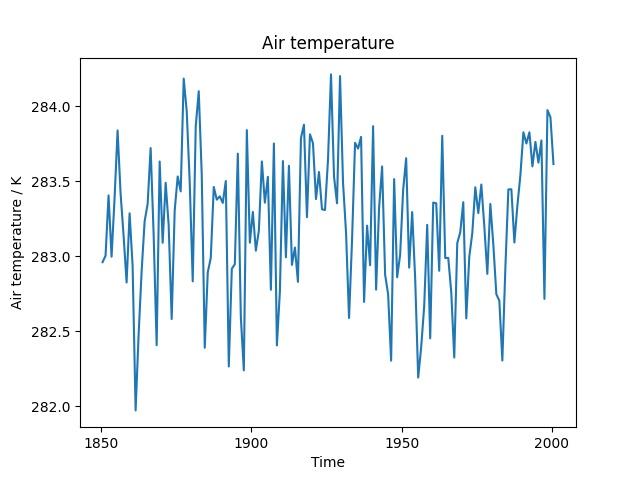

In [8]:
output['timeseries/script1'][0]

In [9]:
output['map/script1'][2]

DataFile('CMIP5_CanESM2_Amon_historical_r1i1p1_tas_2000-2000.nc')

ImageFile('CMIP5_CanESM2_Amon_historical_r1i1p1_tas_2000-2000.png')
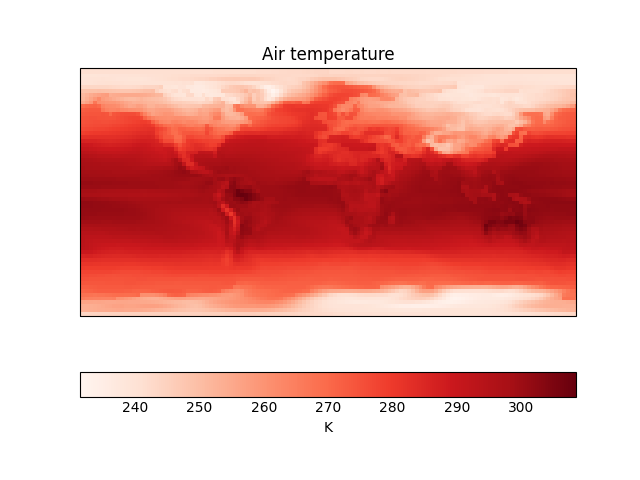

In [10]:
output['map/script1'][1]

If the output is a dataset, you can load it with `xarray` or `iris`. In this way, you can immediately continue to work with the (pre-)processed data in your notebook.

In [12]:
xrds = output['map/script1'][2].load_xarray()
xrds

<xarray.Dataset>
Dimensions:       (bnds: 2, lat: 64, lon: 128)
Coordinates:
  * lat           (lat) float64 -87.86 -85.1 -82.31 -79.53 ... 82.31 85.1 87.86
  * lon           (lon) float64 0.0 2.812 5.625 8.438 ... 351.6 354.4 357.2
    height        float64 2.0
    month_number  int64 1
    time          object 2000-01-16 12:00:00
Dimensions without coordinates: bnds
Data variables:
    tas           (lat, lon) float32 242.20467 242.0047 ... 243.96913 244.07257
    lat_bnds      (lat, bnds) float64 -90.0 -86.48 -86.48 ... 86.48 86.48 90.0
    lon_bnds      (lon, bnds) float64 -1.406 1.406 1.406 ... 355.8 355.8 358.6
    time_bnds     (bnds) object 2000-01-01 00:00:00 2000-02-01 00:00:00
Attributes:
    CCCma_data_licence:     1) GRANT OF LICENCE - The Government of Canada (E...
    CCCma_parent_runid:     IGA
    CCCma_runid:            IGM
    associated_files:       baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLoc...
    branch_time:            171915.0
    branch_time_YMDH:       2321:01:01:00
    cmor_version:           2.5.4
    contact:                cccma_info@ec.gc.ca
    experiment:             historical
    experiment_id:          historical
    forcing:                GHG,Oz,SA,BC,OC,LU,Sl,Vl (GHG includes CO2,CH4,N2...
    frequency:              mon
    initialization_method:  1
    institute_id:           CCCma
    institution:            CCCma (Canadian Centre for Climate Modelling and ...
    model_id:               CanESM2
    modeling_realm:         atmos
    original_name:          ST
    parent_experiment:      pre-industrial control
    parent_experiment_id:   piControl
    parent_experiment_rip:  r1i1p1
    physics_version:        1
    product:                output
    project_id:             CMIP5
    realization:            1
    references:             http://www.cccma.ec.gc.ca/models
    source:                 CanESM2 2010 atmosphere: CanAM4 (AGCM15i, T63L35)...
    table_id:               Table Amon (31 January 2011) 53b766a395ac41696af4...
    title:                  CanESM2 model output prepared for CMIP5 historical
    Conventions:            CF-1.7
    provenance:             <?xml version='1.0' encoding='ASCII'?>\n<prov:doc...
    software:               Created with ESMValTool v2.2.0
    caption:                Average Near-Surface Air Temperature between 2000...

In [13]:
cube = output['map/script1'][2].load_iris()[0]
print(cube)

air_temperature / (K)               (latitude: 64; longitude: 128)
     Dimension coordinates:
          latitude                           x              -
          longitude                          -              x
     Scalar coordinates:
          height: 2.0 m
          month_number: 1
          time: 2000-01-16 12:00:00, bound=(2000-01-01 00:00:00, 2000-02-01 00:00:00)
     Attributes:
          CCCma_data_licence: 1) GRANT OF LICENCE - The Government of Canada (Environment Canada) is...
          CCCma_parent_runid: IGA
          CCCma_runid: IGM
          Conventions: CF-1.7
          associated_files: baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLocation gridspecFile: gridspec_atmos_fx_CanESM2_historical_r0i0p0.nc...
          branch_time: 171915.0
          branch_time_YMDH: 2321:01:01:00
          caption: Average Near-Surface Air Temperature between 2000 and 2000 according to...
          cmor_version: 2.5.4
          contact: cccma_info@ec.gc.ca
          experiment: hi

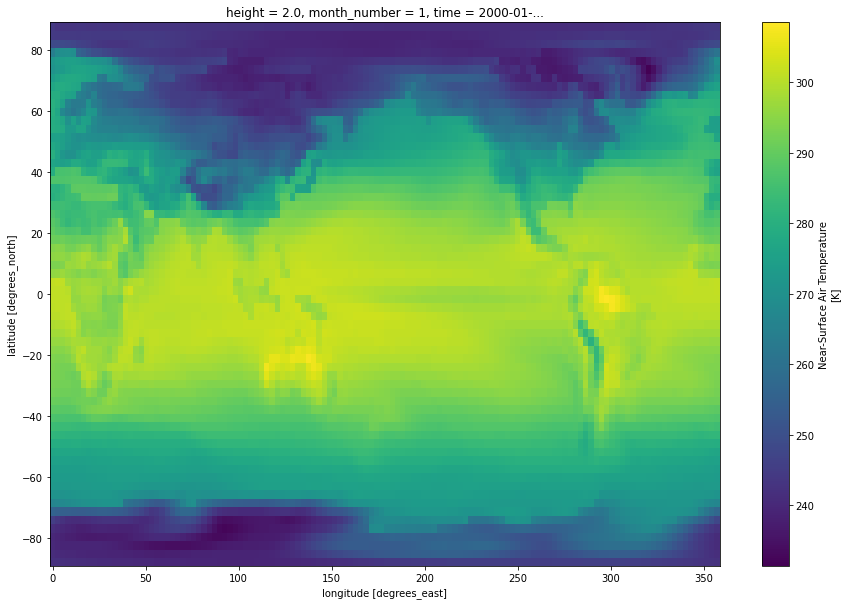

In [14]:
xrds.tas.plot(figsize=(15, 10))

### Final remarks

For more information on all available recipes, visit the [ESMValTool documentation](https://docs.esmvaltool.org/en/latest/recipes/index.html). If you're interested in more advanced use cases, please contact us, e.g. p.kalverla@esciencecenter.nl